# Project: Analyzing Voter Registration and Participation Using CPS Data

### Objective:

To analyze the Voting and Registration Supplement of the Current Population Survey (CPS) to understand voter registration and participation patterns.

### Step 1: Identifying Voter Registration and Participation

To determine if an individual voted and if they were registered to vote, I examined the CPS code book. The most straightforward indicator is the question asking if the respondent is registered to vote. If the response is 'yes,' indicating they are registered, further scrutiny is required to ensure consistency. For instance, if a respondent indicates they did not vote due to certain reasons or claims to be under 18, these responses should be excluded from the registered voter population. Specifically, I combined variables from PES1 and PES2 to create a new variable representing registered voters accurately.




### Step 2: Calculating Voter Participation Percentages

Many surveys employ weights to ensure demographic balance. Instead of simply counting responses, these weights adjust the results to reflect the population accurately. In this analysis, I used the weight variable (PWSSWGT/10000) along with the age and identified voting variables to calculate the following:

1. The percentage of all adults who voted in the 2020 election.
2. The percentage of adult citizens who voted in the 2020 election.


To ensure the accuracy of these calculations, I compared my results with the summary document table04c.xlsx produced by the Census Bureau.

In [ ]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

Saving cps_nov2020_extract.csv to cps_nov2020_extract.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cps_nov2020_extract.csv']))
df

,id,PWSSWGT,PRTAGE,PRCITSHP,PES1,PES2,PES3,PES4,PES5,PES6,PES7,gestfips,wt
0,1,19598476,35,1,1,-1,-1,-1,1,1,3,1,1959.8476
1,2,19697842,33,1,1,-1,-1,-1,1,1,3,1,1969.7842
2,3,22037480,7,1,-1,-1,-1,-1,-1,-1,-1,1,2203.7480
3,4,21191643,5,1,-1,-1,-1,-1,-1,-1,-1,1,2119.1643
4,5,22660894,3,1,-1,-1,-1,-1,-1,-1,-1,1,2266.0894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134117,134118,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,56,0.0000
134118,134119,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,56,0.0000
134119,134120,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,56,0.0000
134120,134121,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,56,0.0000


In [ ]:
import pandas as pd

df1 = df[df['wt'] != 0] #removes irrelvant rows
df1 = df1[df1['PRTAGE'] >= 18] #removes anyone under the age of 18

total_adults = df1['wt'].sum()

total_adult_citizens = df1[df1['PRCITSHP'] <= 4]
total_adult_citizens = total_adult_citizens[total_adult_citizens['PRCITSHP'] >= 1] #removes all non citizens
total_adult_citiz = total_adult_citizens['wt'].sum()

df1 = df1[df1['PES1'] == 1] #isolates people who voted
no_of_voters = df1['wt'].sum()


print("Percentage of adults who voted:", round(((no_of_voters/total_adults) * 100), 2),"%" )
print("Percentage of adult citizens who voted:", round(((no_of_voters/total_adult_citiz) * 100), 2),"%" )

Percentage of adults who voted: 61.29 %
Percentage of adult citizens who voted: 66.77 %


### Step 3: Calculating Voter Registration Percentages

Next, I repeated the analysis to calculate the percentages of (a) all adults and (b) adult citizens who were registered to vote. Using the codebook, I verified that I correctly identified the population of registered voters. It's important to note that everyone who voted was registered to vote. I used the same weight variable (PWSSWGT/10000) and age variable, combined with the voter registration variables identified earlier. Finally, I confirmed my results by comparing them to the summary document table04c.xlsx produced by the Census Bureau.

In [ ]:
df2 = df[df['PES2'] == 1] #creates new table for people who are registered to vote, but didn't vote
df3 = df[df['PES1'] == 1] #creates new table for people who voted

df2 = df2[df2['PRTAGE'] >= 18] #removes anyone under the age of 18
df2 = df2[df2['wt'] != 0] #removes irrelvant rows

df3 = df3[df3['PRTAGE'] >= 18]
df3 = df3[df3['wt'] != 0]

df4 = pd.concat([df2, df3]) #dataframe for all adults who are registered to vote

total_registered_adults = df4['wt'].sum()

print("Percentage of adults who are registered to vote :", round(((total_registered_adults/total_adults) * 100), 2),"%" )
print("Percentage of adult citizens who are registered vote:", round(((total_registered_adults/total_adult_citiz) * 100), 2),"%" )

Percentage of adults who are registered to vote : 66.72 %
Percentage of adult citizens who are registered vote: 72.67 %


### Step Task 4: Analyzing Voter Turnout by Age

I examined how voter turnout varied by age in the 2020 election. For this analysis, I used the number of adult citizens as the denominator. I produced a graph to illustrate the variation in turnout across different age groups and wrote a brief description of my findings. This analysis provides insights into the voting patterns of different age demographics. The results and visual representation highlight the differences in voter engagement among various age groups.

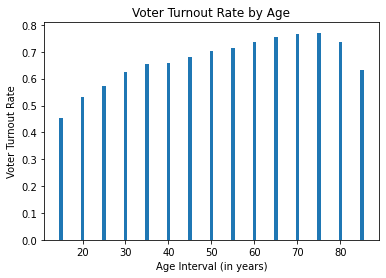

In [ ]:
#Voter Turnout Graph

import matplotlib.pyplot as plt
import numpy as np

total_adult_citizens['PES1'] = np.where(total_adult_citizens['PES1'] == 1, 1, 0) # change index of PES1 for people who responded other than 1 to 0

total_adult_citizens['age_interval'] = np.floor(total_adult_citizens['PRTAGE']/5)*5 # create age intervals

grouped = total_adult_citizens.groupby('age_interval').agg({'PES1': 'mean'}) #avg voter turnout for each interval
grouped = grouped.reset_index()

plt.bar(grouped['age_interval'], grouped['PES1'])
plt.xlabel('Age Interval (in years)')
plt.ylabel('Voter Turnout Rate')
plt.title('Voter Turnout Rate by Age')
plt.show()

Text(0.5, 1.0, 'Voter Count by Age')

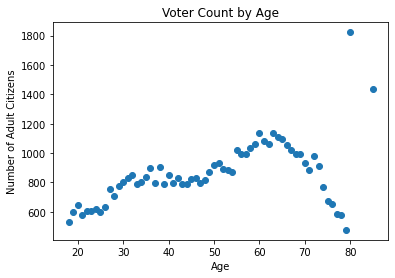

In [ ]:
#Voter Count Graph

df5 = df[df['PRTAGE'] >= 18] #removes anyone under the age of 18
df5 = df5[df5['wt'] != 0]
df5 = df5[df5['PRCITSHP'] <= 4]
df5 = df5[df5['PRCITSHP'] >= 1]
df5 = df5[df5['PES1'] == 1]


age = df5['PRTAGE']
value_counts = age.value_counts()

plt.scatter(value_counts.index, value_counts.values)

# add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Adult Citizens')
plt.title('Voter Count by Age')

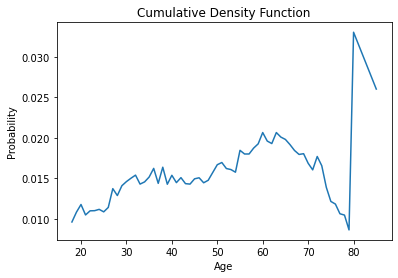

In [ ]:
#Cumulative Density Function Graph

age_list = df5['PRTAGE'].tolist()
age_list = sorted(age_list)

cum_sum = np.cumsum(age_list)

cumulative_frequency = []
frequency = 1
for i in range(1, len(age_list)): #this for loop counts how many times each age is recorded
    if age_list[i] == age_list[i - 1]:
        frequency += 1
    else:
        cumulative_frequency.append(frequency)
        frequency = 1
cumulative_frequency.append(frequency)
cumulative_fraction = [sum(cumulative_frequency)] * (len(cumulative_frequency))
cumulative_fraction_list = []
for i in range(len(cumulative_frequency)):
    cumulative_fraction_list.append(cumulative_frequency[i] / cumulative_fraction[i])



integer_list = list(range(18, 86)) #minimum age was 18 and maximum was 85 with no data from ages 81-84
integer_list.remove(84)
integer_list.remove(83)
integer_list.remove(82)
integer_list.remove(81)

plt.plot(integer_list, cumulative_fraction_list)

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Cumulative Density Function')
plt.show()

The three different graphs shown above are bar graph of voter turnout, a scatter plot of the number of adult citizens per age who voted, and then a cumulative density function graph that shows the percentage of each adult citizen voter age. Looking at the graphs, it is clear that the older citizens are more likely to vote. Something obsure about the data, shown by the graphs (and confirmed by manually looking at the data) was there was no votes recorded for anyone of the age 81-84 and an extensive amount of votes for 85 year old. This could potentially imply the votes by the 81-84 year olds were recorded as 85 year olds.

### Task 5: Creating a Binary Voting Variable

I loaded the CES data (CES2020_extract.csv) and examined the variable CC20_401, where voters reported if they voted in 2020. I created a new variable with the value 1 if the individual voted and 0 if not, assigning missing values for non-responses. I calculated the percentage of individuals who reported voting.

In [ ]:
uploaded = files.upload()

Saving CES2020_extract.csv to CES2020_extract (1).csv


In [ ]:
df6 = pd.read_csv(io.BytesIO(uploaded['CES2020_extract.csv']))

df6["voted"] = np.where(df6["CC20_401"] == 5, "1", "0") #adds a voted column (voted = 1, not voted = 0)

df6.loc[df6['CC20_401'].isnull(), 'voted'] = np.NaN #keeps null values null
df7 = df6[df6['voted'] == '1']
non_voters = df6[df6['voted'] == '0'] #df of non_voters

reported_voting = df7['commonpostweight'].sum() #numerator
total_voters = non_voters['commonpostweight'].sum() #denominator
total_voters = total_voters + reported_voting
print("Reported voting :", round(((reported_voting/total_voters) * 100), 2),"%" )


Reported voting : 90.09 %


### Step 6: Comparing Reported Voting to Validated Voting

I compared the variable CC20_401 to CL_2020gvm, the voter file data on turnout. I created a new binary variable for validated voters. Ignoring non-responses, I calculated the percentage of respondents who (a) reported definitely voting but did not have a validated vote and (b) reported not voting but had a validated vote. This analysis helps understand discrepancies between self-reported and actual voting behavior, revealing potential inaccuracies in self-reported data.

In [ ]:
#check denominator. pretty sure this is wrong.

# (a) reported definitely voting, but did not have a validated vote

#numerator
df8 = df7[df7['CL_2020gvm'].isnull()] #takes df of all who reported voting, and keeps the non-validated votes

#denominator
reported_voting

print("Reported voting but did not have a validated vote", round((((df8['commonpostweight'].sum())/reported_voting)*100),2),"%" )

#(b) reported not voting, but did have a validated vote?

#numerator
df9 = df6[df6['voted'] == '0'] #creates dataframe from those who reported not voting
df9.dropna(subset=['CL_2020gvm'], inplace=True) #remove those with an invalid vote

#denominator
reported_not_voting = non_voters['commonpostweight'].sum()

print("Reported not voting but did have a validated vote", round((((df9['commonpostweight'].sum())/reported_not_voting)*100),2),"%" )

Reported voting but did not have a validated vote 24.9 %
Reported not voting but did have a validated vote 5.57 %


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,caseid,commonweight,commonpostweight,vvweight,vvweight_post,birthyr,gender,educ,race,race_other,...,votereg_post,inputstate_post,CC20_401,CC20_402a,CC20_402b,CC20_403,CC20_410,CL_2020gvm,CL_voter_status,voted


### Step 7: Calculating Turnout Measures

Using the provided dataset, I calculated three measures of turnout as discussed on page 21 of the codebook. I explored how they differ:

1. Using only matched voters as the numerator.
2. Using only matched participants as the denominator.
3. Combining matched voters, those who voted "no" in votereg_post, and those who responded "no" to CC20_401, ensuring no duplicates.


The calculations showed different voter turnout percentages based on these methods, providing insights into turnout measurement variability.

In [ ]:
#numerator is always matched voters (CL_2020gvm has a value (valid vote))
#2. denominator is only matched participants (CL_voter_status has a value)
#3. denominator: all matched people first, then add those who voted no to votereg_post and those who responded no to CC20_401. make sure there are no duplicates in observations. should use or.

#1.
df11 = df6[df6['CL_2020gvm'].notnull()] #dataframe for all matched voters

matched_voters = df11['commonpostweight'].sum()
total_respondents = df6['commonpostweight'].sum()

print('Voter turnout when you consider unmatched as non-voters',round(((matched_voters/total_respondents) * 100), 2),"%" )

#2.
df12 = df6[df6['CL_voter_status'].notnull()]
matched_participants = df12['commonpostweight'].sum()
print('Voter turnout when you consider only matched non-voters as non-voters',round(((matched_voters/matched_participants) * 100), 2),"%" )

#3.
df13 = (df6['votereg_post'] == 2) | (df6['CC20_401'] != 5) | (df6['votereg_post'] == 1)
df14 = df6[df13]
respondents = df14['commonpostweight'].sum()
print('Voter turnout when matched non-voters and self-reported non-voters as non-voters:',round(((matched_voters/respondents) * 100), 2),"%" )

Voter turnout when you consider unmatched as non-voters 59.86 %
Voter turnout when you consider only matched non-voters as non-voters 77.75 %
Voter turnout when matched non-voters and self-reported non-voters as non-voters: 59.98 %


### Step 8: North Carolina Voter Analysis

Whether you vote or not in the United States is a public record. After each election, the North Carolina State Board of Elections3 compiles data on voter turnout by demographics in every precinct. Here, I load the file history_stats_20201103.txt, and look at the documentation in ‘layout_history_stats.txt’.**

In [ ]:
uploaded = files.upload() #upload txt file

Saving history_stats_20201103.txt to history_stats_20201103.txt


In [ ]:
df15 = pd.read_csv('history_stats_20201103.txt', delimiter='\t')
df15

,county_desc,precinct_abbrv,vtd_abbrv,age,party_cd,race_code,ethnic_code,sex_code,total_voters,election_date,stats_type,update_date,voting_method,voting_method_desc,voted_party_cd
0,CUMBERLAND,G3C,G3,Age 26 - 40,REP,W,UN,M,4,11/03/2020,history,12/23/2020,O,ABSENTEE ONESTOP,REP
1,BRUNSWICK,07,07,Age 26 - 40,DEM,B,UN,F,2,11/03/2020,history,12/23/2020,V,IN-PERSON,DEM
2,CURRITUCK,IR,IR,Age 41 - 65,DEM,B,UN,F,2,11/03/2020,history,12/23/2020,M,ABSENTEE BY MAIL,DEM
3,GUILFORD,G40A2,G40A2,Age 18 - 25,UNA,A,NL,M,1,11/03/2020,history,12/23/2020,O,ABSENTEE ONESTOP,UNA
4,STOKES,02,02,Age Over 66,DEM,W,UN,F,1,11/03/2020,history,12/23/2020,U,ABSENTEE CURBSIDE,DEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946299,ROWAN,15,15,Age Over 66,REP,W,UN,M,3,11/03/2020,history,12/23/2020,M,ABSENTEE BY MAIL,REP
946300,RICHMOND,08,08,Age 26 - 40,DEM,U,UN,F,1,11/03/2020,history,12/23/2020,V,IN-PERSON,DEM
946301,GASTON,27,27,Age 41 - 65,UNA,U,HL,M,3,11/03/2020,history,12/23/2020,O,ABSENTEE ONESTOP,UNA
946302,BUNCOMBE,31.1,31.1,Age Over 66,DEM,W,NL,F,22,11/03/2020,history,12/23/2020,O,ABSENTEE ONESTOP,DEM


In [ ]:
#every row has a 'total_voters'
total_nc_voters = df15['total_voters'].sum()
print("Total number of voters in the 2020 election in North Carolina:",total_nc_voters)

Total number of voters in the 2020 election in North Carolina: 5544018


### Step 9: Calculating Turnout Using Citizen Voting Age Population

Using the Citizen Voting Age Population from the 2020 American Community Survey (7,636,495 people), I calculated the turnout according to the official voter file, which was 72.6%.

In [ ]:
print('Turnout according to the official voter file:',round(((total_nc_voters/7636495) *100),2),'%')

Turnout according to the official voter file: 72.6 %


###Step  10: Comparing Turnout Rates Across Surveys

I compared the voter turnout rate in North Carolina from the voter file to the estimated turnout rates in the CPS and CES. For the CPS, I used the gestfips variable with the FIPS code for North Carolina (37). For the CES, I used the inputstate_post variable with the value 37. I calculated the CES results using both the vote question and the validated vote method. The results showed:



*   NC voter turnout according to CPS: 92.63%
*   NC voter turnout according to CES: 97.99%



This analysis highlights the differences in turnout rates across different surveys and the impact of vote validation on estimates.

In [ ]:

#cps voter turnout

#df4 is already filtered out wt = 0 and minors.
df16 = df4[df4['gestfips'] == 37] #takes all nc registered population
df17 = df16[df16['PES1'] == 1] #takes all who voted in nc
print('NC voter turnout according to CPS:',round(((df17['wt'].sum()/df16['wt'].sum()) *100), 2),'%')


#ces voter turnout
#denominator is a validated vote
df18 = df6[df6['inputstate_post'] == 37] #filters for only people in north carolina
df18.dropna(subset=['CL_2020gvm'], inplace=True) #all those with a valid vote
df19 = df18[df18['voted'] == '1'] #all those who voted


print('NC voter turnout according to CES:',round(((df19['commonpostweight'].sum()/df18['commonpostweight'].sum()) *100), 2),'%')

NC voter turnout according to CPS: 92.63 %
NC voter turnout according to CES: 97.99 %


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



### Analysis and Recommendations


Observing the graphs from question 4, it is clear that voter turnout is higher among older citizens than younger citizens. The first graph shows the turnout percentage for different age groups, the second graph shows the count of how many of each age group voted, and the third graph shows the probability of a voter being a specific age. By analyzing the CPS Voting and Registration Supplement and examining questions about reasons for not voting or not being registered, it becomes evident that there are meaningful differences between younger and older voters.

Younger voters often cited 'lack of interest' or a 'feeling of insignificance' as primary reasons for not voting in the 2020 election. In contrast, older voters were more likely to report logistical issues, such as difficulty getting to polling stations or health concerns, as their main reasons. Additionally, younger voters were more likely to report not being registered due to a lack of information about the registration process or because they missed registration deadlines, whereas older voters who were not registered cited long-term disengagement or skepticism about the voting process.

To increase voter turnout among younger voters, the organization should focus on strategies that address these specific barriers. Here are a few recommendations:

1. Increase Accessibility: Establish polling stations on college campuses and in areas with high concentrations of young people to make voting more convenient.
2. Awareness Campaigns: Run targeted campaigns that highlight the impact of elections on issues that matter to younger voters, emphasizing how their votes can influence policy changes.
3. Simplify Registration: Provide clear, easy-to-follow information on how to register to vote and important deadlines. Consider working with universities to integrate voter registration into the enrollment process.
4. Engage with Technology: Utilize social media and other digital platforms to engage with younger voters, providing reminders about registration deadlines and election dates, and sharing stories of how voting has made a difference in their communities.


By addressing the specific reasons younger voters feel disengaged or face barriers to voting, the organization can help reduce the turnout gap between younger and older voters and foster a more inclusive democratic process.